In [2]:
%run -i notebook_preamble.ipy

In [76]:
import pandas_profiling
import seaborn as sns

/home/alex/anaconda3/envs/GIS/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
df = pd.read_csv(f"{data_path}/raw/normalised_eu_indicators/eu_top_1000_2005_to_2017.csv")

df.head()

,country,rnd_1_year_growth_%,capex_1_year_growth_%,capex_eur_million,capex_int_%,company,employees,employees_1_year_growth_%,eu_rank,industrial_sector,profitability_%,profits_1_year_growth_%,profits_losses_eur_million,rnd_eur_million,rnd_intensity_%,sales_1_year_growth_%,sales_eur_million,year
0,germany,1.56,4.89,4.53,NaN,daimlerchrysler,379.02,2.25,1,automobiles & parts (31),2.4,NaN,NaN,5658.00,3.98,4.12,142059.0,2004
1,germany,-8.13,4.56,3.98,NaN,siemens,419.20,-0.02,2,electronic & electrical (25),4.0,NaN,NaN,5063.00,6.74,1.26,75167.0,2004
2,germany,0.58,15.25,13.73,NaN,volkswagen,321.09,2.03,3,automobiles & parts (31),2.0,NaN,NaN,4164.00,4.68,0.62,88963.0,2004
3,uk,1.72,4.06,4.88,NaN,glaxosmithkline,99.84,-3.23,4,pharma & biotech (48),30.3,NaN,NaN,4010.09,13.94,-5.05,28757.0,2004
4,france,-2.63,NaN,NaN,NaN,sanofi-aventis,96.44,NaN,5,pharma & biotech (48),11.6,NaN,NaN,3961.00,15.58,4.62,25418.0,2004


# Profiling

In [34]:
pandas_profiling.ProfileReport(df)

Number of variables,18
Number of observations,12700
Total Missing (%),8.1%
Total size in memory,1.7 MiB
Average record size in memory,144.0 B
Numeric,12
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [42]:
# Missing variables by year
dfg = df.groupby('year')
display(dfg
        .apply(lambda x: x.isnull().sum(0))
        .T
       )

display(dfg.size())

year,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
country,0,0,0,0,0,0,0,0,0,0,0,0,0
rnd_1_year_growth_%,14,49,24,17,17,11,6,7,7,6,19,18,7
capex_1_year_growth_%,83,93,36,154,31,30,24,386,332,347,394,386,120
capex_eur_million,69,72,17,142,27,25,14,385,328,340,345,0,103
capex_int_%,700,1000,1000,1000,1000,1000,14,391,13,13,18,189,117
company,0,0,0,0,0,0,0,0,0,0,0,0,0
employees,12,0,0,0,0,0,0,0,47,0,0,0,17
employees_1_year_growth_%,19,27,16,18,16,16,14,61,51,47,37,231,43
eu_rank,0,0,0,0,0,0,0,0,0,0,0,0,0
industrial_sector,0,0,0,0,0,0,0,0,0,0,0,0,0


year
2004     700
2005    1000
2006    1000
2007    1000
2008    1000
2009    1000
2010    1000
2011    1000
2012    1000
2013    1000
2014    1000
2015    1000
2016    1000
dtype: int64

year
2004    32
2005    44
2006    44
2007    45
2008    45
2009    45
2010    45
2011    38
2012    39
2013    39
2014    40
2015    36
2016    39
Name: industrial_sector, dtype: int64

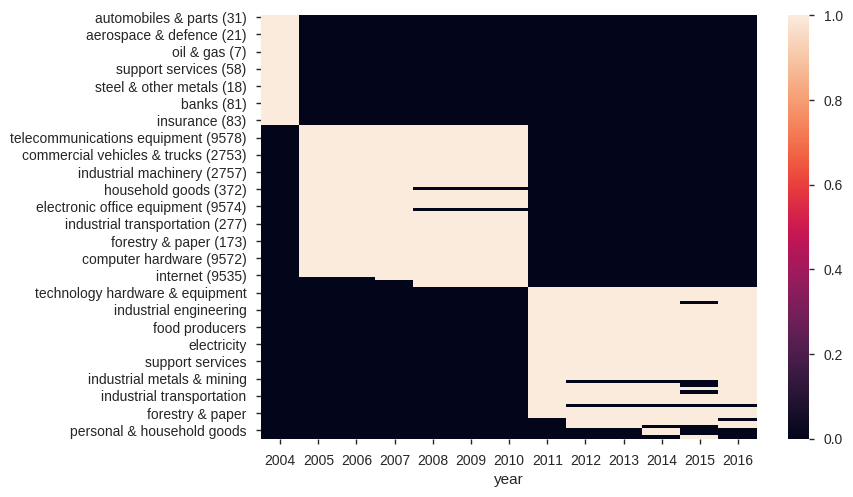

In [79]:
# Number of unique `industrial_sector` sectors by year
display(dfg.industrial_sector.nunique())

# Change in sector naming
display(dfg
        .industrial_sector
        .unique()
        .apply(lambda x: pd.Series(1, x))
        .fillna(0)
        .T
        .pipe(sns.heatmap)
       )

**Profiling observations:**
    
* 390 companies with no `employees`
* some companies have fractional `employees`
* very large negative `profitability_%` values
* very large `profit_1y_growth_%` values
* `rnd_growth_%` is left censored (big decreases -> not top 1000 anymore)
* only 700 companies in 2004
* `capex_int_%` starts 2010
* `profits_1_year_growth_%` and `profits_losses_eur_million` starts 2011
* `industrial_sector` naming changes twice over time

# EDA

# Model